Så, vi har vår givna ciphertext, som uppenbarligen innehåller en massa unicodetecken:

In [1]:
given_cipher_text = 'ÚñąĆøĂµÝČċčûđ¼ƁĐ¿ĆĆĖĄĖĊÆƋĖÉċęĐğďÏěĒĦħęħ×'

Vi börjar med omvandla strängen till en lista med integers som motsvarar respektive unicodeteckens code point, och printar denna lista för att se om vi ser något mönster:

In [2]:
code_points = [ord(char) for char in given_cipher_text]
print(code_points)

[218, 241, 261, 262, 248, 258, 181, 221, 268, 267, 269, 251, 273, 188, 385, 272, 191, 262, 262, 278, 260, 278, 266, 198, 395, 278, 201, 267, 281, 272, 287, 271, 207, 283, 274, 294, 295, 281, 295, 215]


Inget direkt iögonfallande, annat än att numrena verkar ligga mellan 250 och 300, med några outliers. Man kan även notera att det är relativt ovanligt att ett nummer (och således tecken) förekommer mer än en gång (vilket man hade kunnat förvänta sig av ett t.ex. ett rent caesarskiffer). Intressant. Låt oss plotta numrena och se om vi blir klokare:

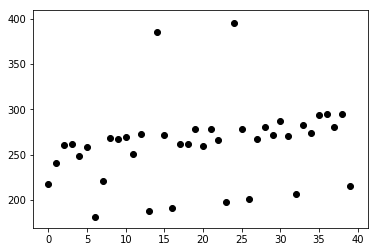

[218, 241, 261, 262, 248, 258, 181, 221, 268, 267, 269, 251, 273, 188, 385, 272, 191, 262, 262, 278, 260, 278, 266, 198, 395, 278, 201, 267, 281, 272, 287, 271, 207, 283, 274, 294, 295, 281, 295, 215]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(points):
    for index, point in enumerate(points):
        plt.scatter(index, point, c='black') 
    plt.show()
    print(points)

plot(code_points)

Sedärja. Intuitionen stämde. Och det verkar som att punkterna trendar uppåt, vilket förklarar varför det är relativt ovanligt att samma tecken förekommer flera gånger. Låt oss subtrahera index-offsetten från varje tecken och plotta igen:

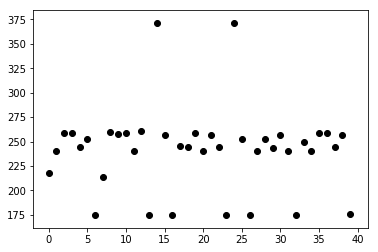

[218, 240, 259, 259, 244, 253, 175, 214, 260, 258, 259, 240, 261, 175, 371, 257, 175, 245, 244, 259, 240, 257, 244, 175, 371, 253, 175, 240, 253, 243, 257, 240, 175, 250, 240, 259, 259, 244, 257, 176]


In [4]:
corrected_points = [point - index for index, point in enumerate(code_points)]

plot(corrected_points)

Ja, det där ser rimligare ut. Men det verkar fortfarande vara en konstant offset uppåt (det vill säga i princip ett caesarskiffer). Låt oss anta att de nedre utliggarna, som är jämnt fördelade över strängen, skall vara mellanslagstecken. De har här värdet 175, och mellanslag har code point 32, så låt oss definiera 175 - 32 som offset och shifta hela listan nedåt:

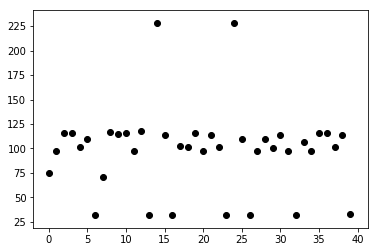

[75, 97, 116, 116, 101, 110, 32, 71, 117, 115, 116, 97, 118, 32, 228, 114, 32, 102, 101, 116, 97, 114, 101, 32, 228, 110, 32, 97, 110, 100, 114, 97, 32, 107, 97, 116, 116, 101, 114, 33]


In [5]:
offset = 175 - 32
shifted_points = [point - offset for point in corrected_points]

plot(shifted_points)

Ser rimligt ut, majoriteten av tecknen ligger i az-intervallet, första teckenet ligger i AZ-intervallet och de två övre utliggarna skulle kunna vara å, ä eller ö. Låt oss omvandla tillbaka till unicodetecken och printa:

In [6]:
chars = [chr(point) for point in shifted_points]

print(''.join(chars))

Katten Gustav är fetare än andra katter!


Bingo!

Avslutningsvis, låt oss definiera funktioner för att kryptera och dekryptera:

In [7]:
def encrypt(clear_text, key):
    return ''.join([chr(ord(char) + key + index) for index, char in enumerate(clear_text)])

def decrypt(cipher_text, key):
    return ''.join([chr(ord(char) - key - index) for index, char in enumerate(cipher_text)])


Och så testar vi dessa:

In [8]:
key = 143
input_clear_text = 'Katten Gustav är fetare än andra katter!'
output_cipher_text = encrypt(input_clear_text, key)
output_clear_text = decrypt(output_cipher_text, key)

print(output_cipher_text)
print(output_clear_text)

ÚñąĆøĂµÝČċčûđ¼ƁĐ¿ĆĆĖĄĖĊÆƋĖÉċęĐğďÏěĒĦħęħ×
Katten Gustav är fetare än andra katter!


∎